In [28]:
"""Jupyter Notebook for finding the hard-soft boundary 
    we will use to define our binary population given by cosmic
    HS Cutoff period should be longer for OCs (less dense) 
    and shorter for GCs (more densely packed)"""

'Jupyter Notebook for finding the hard-soft boundary \n    we will use to define our binary population given by cosmic\n    HS Cutoff period should be longer for OCs (less dense) \n    and shorter for GCs (more densely packed)'

In [29]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import multidim
from cosmic.evolve import Evolve

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Dictionary neeeded for evolving the binaries
BSEDict = {'xi': 0.5, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 0,\
           'alpha1': 1.0, 'pts1': 0.05, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, \
           'hewind': 1.0, 'ck': -1000, 'bwind': 0.0, 'lambdaf': 1.0, 'mxns': 3.0, \
           'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'nsflag': 3, 'ceflag': 0, 'eddfac': 1.0, \
           'merger': 0, 'ifflag': 0, 'bconst': -3000, 'sigma': 265.0, 'gamma': -2.0, \
           'ppsn': 1, 'natal_kick_array' :[-100.0,-100.0,-100.0,-100.0,-100.0,-100.0], \
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, \
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],\
           'cekickflag' : 0, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsnp' : 2.5, \
           'ecsn_mlow' : 1.6, 'aic' : 1, 'sigmadiv' :-20.0}

In [32]:
final_kstar1 = [11,12]
final_kstar2 = [10]

# Sampling initial binaries - pulled from cosmic's documentation
InitialBinaries, sampled_mass, n_sampled = InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, \
                            primary_model='kroupa93', ecc_model='thermal', SFH_model='const', \
                            component_age=10000.0, met=0.02, size=60000)

In [33]:
p_i = InitialBinaries['porb'] #given in days *i think: https://cosmic-popsynth.github.io/examples/index.html


<IPython.core.display.Javascript object>


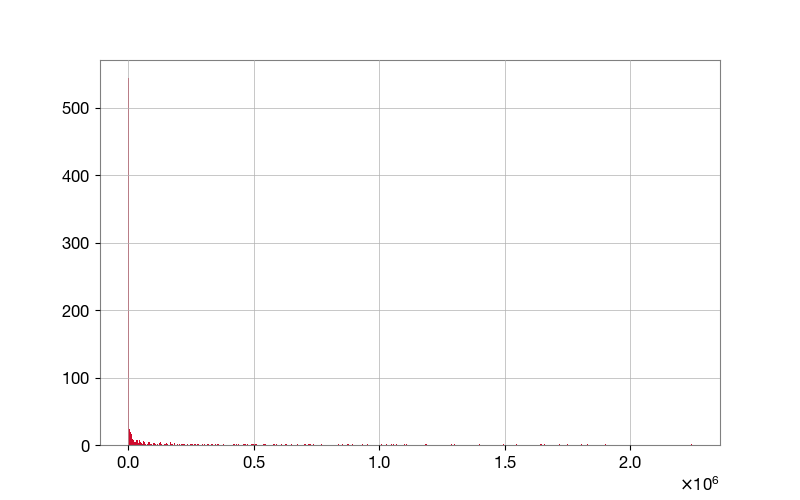

(array([544.,  57.,  24., ...,   0.,   0.,   1.]),
 array([1.61121718e+00, 2.24575597e+03, 4.48990073e+03, ...,
        2.23965808e+06, 2.24190222e+06, 2.24414637e+06]),
 <a list of 1000 Patch objects>)

In [34]:
# Initial Binary Period Histogram
f,ax = plt.subplots(figsize = (8,5))

ax.hist(p_i, bins = 1000, color = '#CF0A2C')

In [35]:
# Evolving the binaries
bpp, bcm, initC  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

In [36]:
p_f = bcm['porb']